<a href="https://colab.research.google.com/github/tsd10/SmartFarm/blob/main/Preprocessing_SAM2_grayscale.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install git+https://github.com/facebookresearch/segment-anything.git
!pip install opencv-python-headless matplotlib

  Cloning https://github.com/facebookresearch/segment-anything.git to /tmp/pip-req-build-a5scmveb
  Running command git clone --filter=blob:none --quiet https://github.com/facebookresearch/segment-anything.git /tmp/pip-req-build-a5scmveb
  Resolved https://github.com/facebookresearch/segment-anything.git to commit dca509fe793f601edb92606367a655c15ac00fdf
  Preparing metadata (setup.py) ... done
  Created wheel for segment_anything: filename=segment_anything-1.0-py3-none-any.whl size=36592 sha256=4f4b7a1cec51bd60bfe080b5ef6cee5eb1cc71764aca9ad3ce0f8ba8bfbff3f0
  Stored in directory: /tmp/pip-ephem-wheel-cache-hy7t_qzz/wheels/10/cf/59/9ccb2f0a1bcc81d4fbd0e501680b5d088d690c6cfbc02dc99d
Successfully built segment_anything


In [2]:
!pip install torch torchvision
!pip install opencv-python matplotlib
!git clone https://github.com/facebookresearch/segment-anything.git
!pip install -e segment-anything

Cloning into 'segment-anything'...
remote: Enumerating objects: 304, done.
remote: Counting objects: 100% (5/5), done.
remote: Compressing objects: 100% (4/4), done.
remote: Total 304 (delta 2), reused 1 (delta 1), pack-reused 299 (from 2)
Receiving objects: 100% (304/304), 18.31 MiB | 20.36 MiB/s, done.
Resolving deltas: 100% (159/159), done.
Obtaining file:///content/segment-anything
  Preparing metadata (setup.py) ... done
  Attempting uninstall: segment_anything
    Found existing installation: segment_anything 1.0
    Uninstalling segment_anything-1.0:
      Successfully uninstalled segment_anything-1.0
  Running setup.py develop for segment_anything


In [7]:
# Clone the official repository
!git clone https://github.com/facebookresearch/segment-anything.git

# Navigate into the repository
%cd segment-anything

# Install the module
!pip install -e .


Cloning into 'segment-anything'...
remote: Enumerating objects: 304, done.
remote: Counting objects: 100% (5/5), done.
remote: Compressing objects: 100% (4/4), done.
remote: Total 304 (delta 2), reused 1 (delta 1), pack-reused 299 (from 2)
Receiving objects: 100% (304/304), 18.31 MiB | 37.20 MiB/s, done.
Resolving deltas: 100% (159/159), done.
/content/segment-anything/segment-anything
Obtaining file:///content/segment-anything/segment-anything
  Preparing metadata (setup.py) ... done
  Attempting uninstall: segment_anything
    Found existing installation: segment_anything 1.0
    Uninstalling segment_anything-1.0:
      Successfully uninstalled segment_anything-1.0
  Running setup.py develop for segment_anything


In [8]:
!pip list | grep segment-anything

segment_anything                   1.0                  /content/segment-anything/segment-anything


In [21]:
from segment_anything.utils.transforms import ResizeLongestSide
import numpy as np
# ... other imports ...

class SamPredictor(SamPredictor):
    def __init__(self, sam_model):
        super().__init__(sam_model)
        # Override the transform attribute to be a function
        self.transform = self._my_transform

    def _my_transform(self, coords, original_size):

        # Apply a transformation function here, using the original size
        # This is a placeholder, replace with your desired transformation
        resize_transform = ResizeLongestSide(self.sam.image_encoder.img_size)
        target_size = resize_transform.get_preprocess_shape(original_size)
        # Convert coords to a NumPy array before applying operations
        coords = np.array(coords) * np.array([
            target_size[1] / original_size[1],
            target_size[0] / original_size[0],
        ])
        return coords.tolist()  # Return as a NumPy array instead of a list


# ... the rest of your code ...

In [10]:
import os
import torch
from segment_anything import sam_model_registry, SamPredictor

# Specify model type (ViT-B, ViT-L, ViT-H available)
model_type = "vit_b"
model_url = "https://dl.fbaipublicfiles.com/segment_anything/sam_vit_b_01ec64.pth"
model_path = f"{model_type}.pth"

# Download model
if not os.path.exists(model_path):
    !wget -O {model_path} {model_url}

# Load SAM Model
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
sam = sam_model_registry[model_type](checkpoint=model_path).to(device)
predictor = SamPredictor(sam)


--2024-12-20 04:45:13--  https://dl.fbaipublicfiles.com/segment_anything/sam_vit_b_01ec64.pth
Resolving dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)... 3.163.189.108, 3.163.189.14, 3.163.189.51, ...
Connecting to dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)|3.163.189.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 375042383 (358M) [binary/octet-stream]
Saving to: ‘vit_b.pth’

vit_b.pth           100%[===================>] 357.67M  3.31MB/s    in 5.6s    

2024-12-20 04:45:18 (63.4 MB/s) - ‘vit_b.pth’ saved [375042383/375042383]



In [22]:
import torch
import numpy as np
from segment_anything import SamPredictor, sam_model_registry
import cv2
import matplotlib.pyplot as plt

# Load a test image
image_path = "/content/test_pig_image.png"  # Replace with your image path
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Load SAM model
model_type = "vit_b"
model_path = "vit_b.pth"  # Replace with downloaded model path
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
sam = sam_model_registry[model_type](checkpoint=model_path).to(device)
predictor = SamPredictor(sam)

# Set the image for SAM Predictor
predictor.set_image(image)

# Specify a point for segmentation
input_point = [[250, 400]]  # Example coordinate on the image
input_label = [1]  # Foreground label (1 = object, 0 = background)



# Now run the prediction
masks, scores, logits = predictor.predict(
    point_coords=input_point,
    point_labels=input_label,
    multimask_output=True,
)

# Visualize the segmentation mask
plt.figure(figsize=(10, 10))
plt.imshow(image)
plt.imshow(masks[0].cpu().numpy(), alpha=0.5)  # Convert mask tensor to NumPy array for plotting
plt.axis('off')
plt.show()


/content/segment-anything/segment_anything/build_sam.py:105: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state_dict = torch.load(f)


AttributeError: 'list' object has no attribute 'astype'

In [7]:
!pip install torch torchvision
!pip install transformers
!pip install accelerate
!pip install git+https://github.com/facebookresearch/segment-anything.git
!pip install huggingface-hub

  Cloning https://github.com/facebookresearch/segment-anything.git to /tmp/pip-req-build-gm19qj9m
  Running command git clone --filter=blob:none --quiet https://github.com/facebookresearch/segment-anything.git /tmp/pip-req-build-gm19qj9m
  Resolved https://github.com/facebookresearch/segment-anything.git to commit dca509fe793f601edb92606367a655c15ac00fdf
  Preparing metadata (setup.py) ... done


In [9]:
!wget https://dl.fbaipublicfiles.com/segment_anything/sam_vit_h_4b8939.pth


--2024-12-20 05:41:50--  https://dl.fbaipublicfiles.com/segment_anything/sam_vit_h_4b8939.pth
Resolving dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)... 3.163.189.96, 3.163.189.51, 3.163.189.108, ...
Connecting to dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)|3.163.189.96|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2564550879 (2.4G) [binary/octet-stream]
Saving to: ‘sam_vit_h_4b8939.pth’

sam_vit_h_4b8939.pt 100%[===================>]   2.39G   130MB/s    in 17s     

2024-12-20 05:42:07 (145 MB/s) - ‘sam_vit_h_4b8939.pth’ saved [2564550879/2564550879]



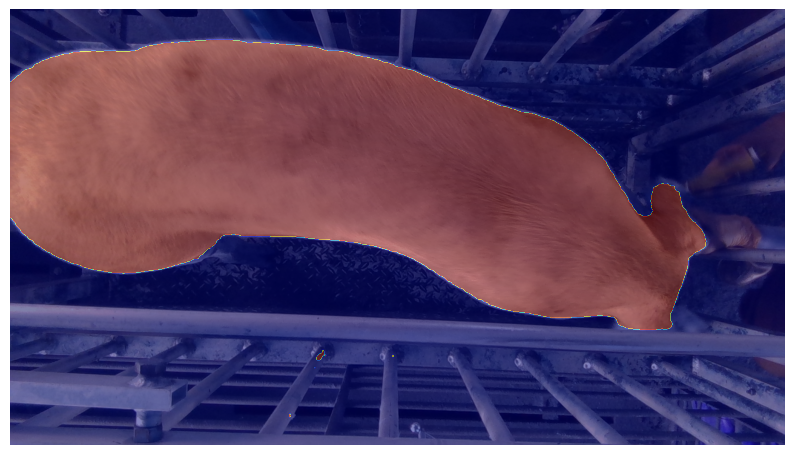

In [15]:
import cv2
import torch
from matplotlib import pyplot as plt
from segment_anything import SamPredictor, sam_model_registry

# Load the image
image_path = "/content/test_pig_image.png"  # Path to your uploaded image
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB

# Load the SAM model
model_type = "vit_h"
checkpoint_path = "sam_vit_h_4b8939.pth"  # Provide the correct path to the checkpoint
device = "cuda" if torch.cuda.is_available() else "cpu"

sam = sam_model_registry[model_type](checkpoint=checkpoint_path)
sam.to(device)

# Initialize the predictor
predictor = SamPredictor(sam)
predictor.set_image(image)

# Define multiple points along the body of the pig for better segmentation
input_points = [
    [150, 200],  # A point near the head
    [300, 400],  # A point near the middle of the body
    [500, 600],  # A point near the back
]
input_labels = [1, 1, 1]  # All points labeled as foreground (1)

# Convert to NumPy arrays
input_points_np = torch.tensor(input_points, dtype=torch.float32).cpu().numpy()
input_labels_np = torch.tensor(input_labels, dtype=torch.int64).cpu().numpy()

# Run prediction
with torch.inference_mode():
    masks, scores, logits = predictor.predict(
        point_coords=input_points_np,
        point_labels=input_labels_np,
        multimask_output=True,  # Get multiple mask suggestions
    )

# Visualize the best mask
best_mask = masks[0]  # Assuming the first mask is the best
plt.figure(figsize=(10, 10))
plt.imshow(image)
plt.imshow(best_mask, alpha=0.5, cmap="jet")  # Overlay the mask
plt.axis("off")
plt.show()


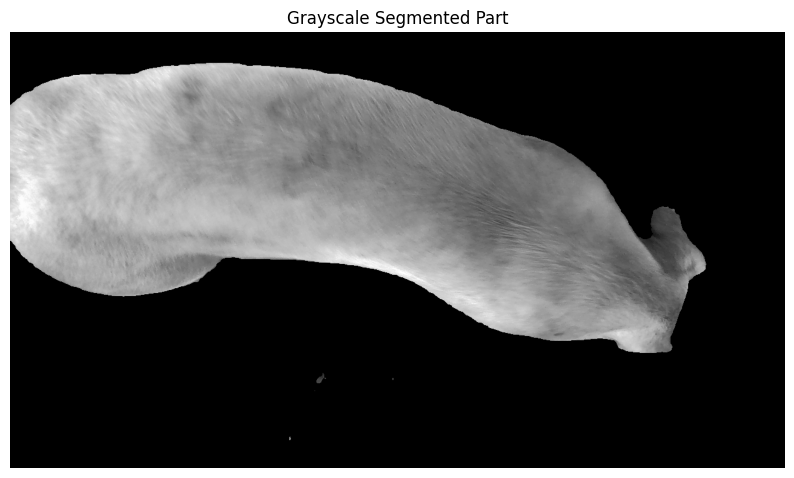

True

In [22]:
import cv2
import numpy as np
import torch
from matplotlib import pyplot as plt
from segment_anything import SamPredictor, sam_model_registry

# Load the image
image_path = "/content/test_pig_image.png"  # Path to your uploaded image
image = cv2.imread(image_path)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB

# Load the SAM model
model_type = "vit_h"
checkpoint_path = "sam_vit_h_4b8939.pth"  # Provide the correct path to the checkpoint
device = "cuda" if torch.cuda.is_available() else "cpu"

sam = sam_model_registry[model_type](checkpoint=checkpoint_path)
sam.to(device)

# Initialize the predictor
predictor = SamPredictor(sam)
predictor.set_image(image_rgb)

# Define multiple points along the body of the pig for better segmentation
input_points = [
    [150, 200],  # A point near the head
    [300, 400],  # A point near the middle of the body
    [500, 600],  # A point near the back
]
input_labels = [1, 1, 1]  # All points labeled as foreground (1)

# Convert to NumPy arrays
input_points_np = torch.tensor(input_points, dtype=torch.float32).cpu().numpy()
input_labels_np = torch.tensor(input_labels, dtype=torch.int64).cpu().numpy()

# Run prediction
with torch.inference_mode():
    masks, scores, logits = predictor.predict(
        point_coords=input_points_np,
        point_labels=input_labels_np,
        multimask_output=True,  # Get multiple mask suggestions
    )

# Use the best mask (first mask in this case)
best_mask = masks[0]

# Apply the mask to the original image
segmented_image = np.zeros_like(image_rgb)  # Create a blank image
for i in range(3):  # Apply the mask to each channel
    segmented_image[..., i] = image_rgb[..., i] * best_mask

# Convert the segmented part to grayscale
segmented_grayscale = cv2.cvtColor(segmented_image, cv2.COLOR_RGB2GRAY)

# Visualize the grayscale segmented part
plt.figure(figsize=(10, 10))
plt.title("Grayscale Segmented Part")
plt.imshow(segmented_grayscale, cmap="gray")
plt.axis("off")
plt.show()

# Save the grayscale image (optional)
output_path = "segmented_grayscale.png"
cv2.imwrite(output_path, segmented_grayscale)


In [19]:
!pip install albumentations


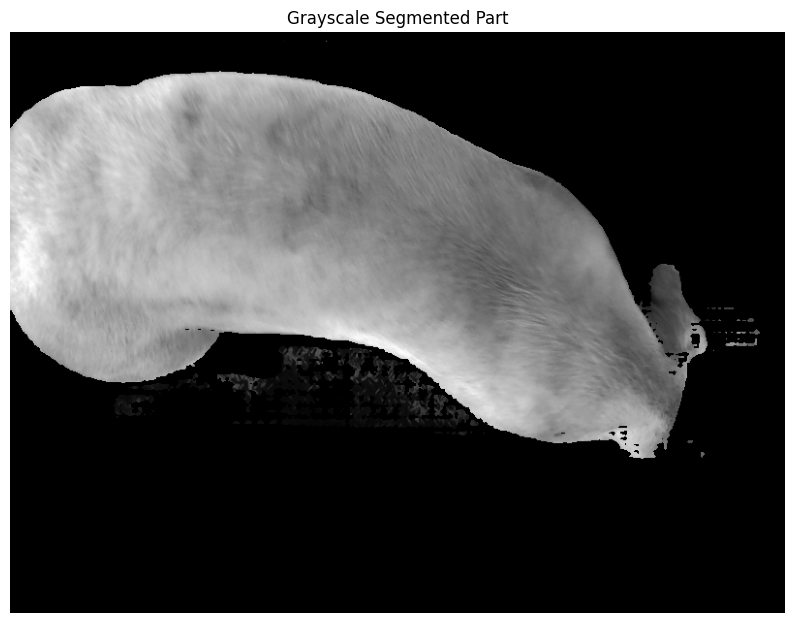

True

In [21]:
import cv2
import numpy as np
import torch
from matplotlib import pyplot as plt
from segment_anything import SamPredictor, sam_model_registry
import albumentations as A

# Load the image
image_path = "/content/test_pig_image.png"  # Path to your uploaded image
image = cv2.imread(image_path)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB

# Define augmentation pipeline
augmentation_pipeline = A.Compose([
    A.RandomScale(scale_limit=0.2, p=1.0),  # Random scaling
    A.RandomRotate90(p=0.5),  # Random 90-degree rotation
    A.HorizontalFlip(p=0.5),  # Random horizontal flip
    A.VerticalFlip(p=0.5),  # Random vertical flip
    A.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.1, p=0.5),  # Random color jitter
    A.GaussianBlur(blur_limit=3, p=0.3),  # Random Gaussian blur
    A.Resize(width=800, height=600)  # Resize the image
])

# Apply augmentation to the image
augmented = augmentation_pipeline(image=image_rgb)
augmented_image = augmented['image']

# Load the SAM model
model_type = "vit_h"
checkpoint_path = "sam_vit_h_4b8939.pth"  # Provide the correct path to the checkpoint
device = "cuda" if torch.cuda.is_available() else "cpu"

sam = sam_model_registry[model_type](checkpoint=checkpoint_path)
sam.to(device)

# Initialize the predictor
predictor = SamPredictor(sam)
predictor.set_image(augmented_image)

# Define multiple points along the body of the pig for better segmentation
input_points = [
    [150, 200],  # A point near the head
    [300, 400],  # A point near the middle of the body
    [500, 600],  # A point near the back
]
input_labels = [1, 1, 1]  # All points labeled as foreground (1)

# Convert to NumPy arrays
input_points_np = torch.tensor(input_points, dtype=torch.float32).cpu().numpy()
input_labels_np = torch.tensor(input_labels, dtype=torch.int64).cpu().numpy()

# Run prediction
with torch.inference_mode():
    masks, scores, logits = predictor.predict(
        point_coords=input_points_np,
        point_labels=input_labels_np,
        multimask_output=True,  # Get multiple mask suggestions
    )

# Use the best mask (first mask in this case)
best_mask = masks[0]

# Apply the mask to the augmented image
segmented_image = np.zeros_like(augmented_image)  # Create a blank image
for i in range(3):  # Apply the mask to each channel
    segmented_image[..., i] = augmented_image[..., i] * best_mask

# Convert the segmented part to grayscale
segmented_grayscale = cv2.cvtColor(segmented_image, cv2.COLOR_RGB2GRAY)

# Visualize the grayscale segmented part
plt.figure(figsize=(10, 10))
plt.title("Grayscale Segmented Part")
plt.imshow(segmented_grayscale, cmap="gray")
plt.axis("off")
plt.show()

# Save the grayscale image (optional)
output_path = "segmented_grayscale.png"
cv2.imwrite(output_path, segmented_grayscale)
